In [1]:
 import numpy as np
 import matplotlib.pyplot as plt
 import numpy as np
 from sklearn.datasets import make_blobs

 # Generate synthetic data
 np.random.seed(0)
 centers = [[-5, 0], [5, 1.5]]

 X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

 transformation = [[0.5, 0.5], [-0.5, 1.5]]
 X = np.dot(X, transformation)

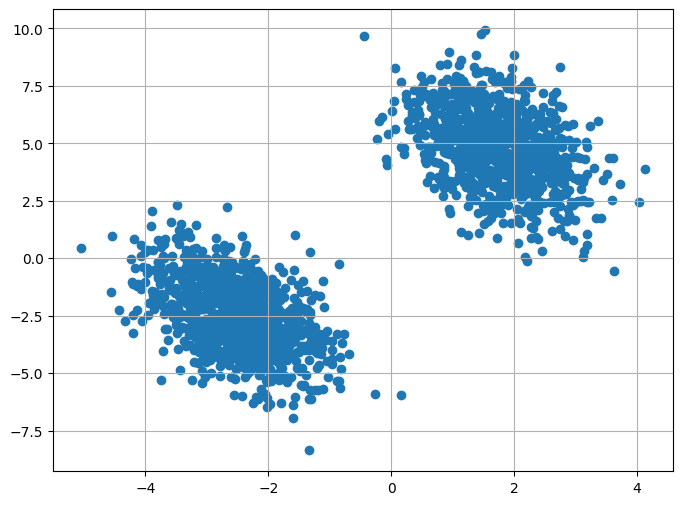

In [12]:
#Visualise the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.grid(True)
plt.show()

## Batch Gradient Descent

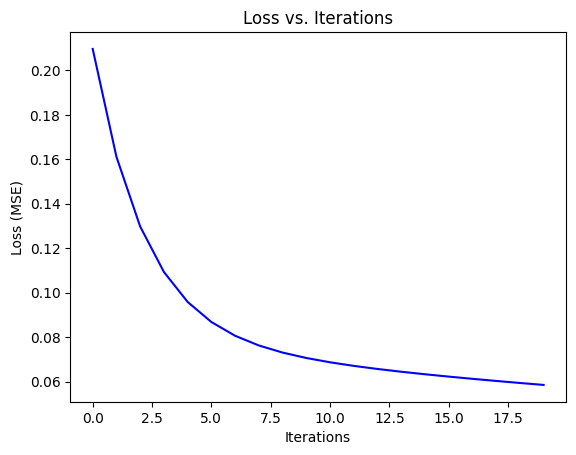

Weights are: [0.02193013 0.12359208]
Bias is: 0.08367596678437207
Minimum Loss: 0.058488730023383236


In [17]:
def batch_gradient_descent(X, y, learning_rate):
  n_iterations = 20
  n_samples, n_features = X.shape

  #Initialize weights and bias to small random values
  weights = np.random.randn(n_features)*0.01
  bias = np.random.randn()*0.01

  losses_bg = []

  for i in range(n_iterations):
      y_pred = np.dot(X, weights) + bias

      #Loss (Mean Squared Error)
      loss = (1/(2*n_samples))*np.sum((y_pred - y)**2)
      losses_bg.append(loss)

      #Gradients
      dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
      db = (1 / n_samples) * np.sum(y_pred - y)

      #Update parameters
      weights = weights - dw*learning_rate
      bias = bias - db*learning_rate

  plt.plot(range(n_iterations), losses_bg)
  plt.title('Loss vs. Iterations')
  plt.xlabel('Iterations')
  plt.ylabel('Loss (MSE)')
  plt.show()

  print("Weights are:", weights)
  print("Bias is:", bias)
  print("Minimum Loss:", min(losses_bg))

  return losses_bg

losses_bg = batch_gradient_descent(X, y, 0.01)


In [18]:
losses_bg

[0.20963477077872728,
 0.1611159088207364,
 0.1297470336380238,
 0.10930339599015804,
 0.09582509000520555,
 0.08679275469230413,
 0.08060329410434991,
 0.0762364182267041,
 0.07304255151564067,
 0.07060793489542538,
 0.06866882513299856,
 0.06705692165741718,
 0.0656646550205642,
 0.06442310801220767,
 0.06328797157893447,
 0.06223061117634235,
 0.061232383566145514,
 0.06028102104824215,
 0.05936833069598835,
 0.058488730023383236]

## Stochastic Gradient Descent

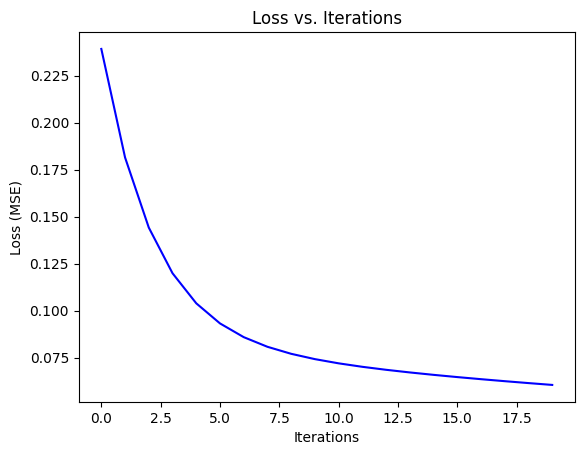

Weights are: [0.02794303 0.12104804]
Bias is: 0.07851895000409807
Minimum Loss: 0.060530166024089206


In [63]:
def stochastic_gradient_Descent(X, y,learning_rate):
  n_iterations = 20
  n_samples, n_features = X.shape

  #Initialize weights and bias to small random values
  weights = np.random.randn(n_features)*0.01
  bias = np.random.randn()*0.01

  losses_sg = []

  for m in range(n_iterations):
      for i in range(n_samples):
        #For one sample
        X_sample = X[i, :].reshape(1, -1)
        y_sample = y[i]

        y_pred = np.dot(X_sample, weights) + bias

        #Loss (Mean Squared Error)
        loss = (1/2)*((y_pred-y_sample)**2)

        #Gradients
        dw = (X_sample.T*loss).flatten()
        db = loss

        #Update parameters
        weights = weights - learning_rate*dw
        bias = bias - learning_rate*db

      y_pred_full = np.dot(X, weights) + bias
      loss = (1/(2*n_samples))*np.sum((y_pred_full-y)**2)
      losses_sg.append(loss)

  plt.plot(range(n_iterations), losses_sg)
  plt.title('Loss vs. Iterations')
  plt.xlabel('Iterations')
  plt.ylabel('Loss (MSE)')
  plt.show()

  print("Weights are :",weights)
  print("Bias is : ",bias)
  print(min(losses_sg))

  return losses_sg

losses_sg = batch_gradient_descent(X, y,0.01)


## Newton’s Method

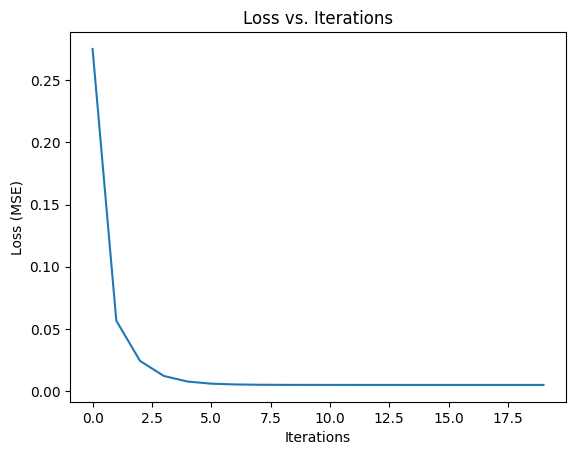

Weights are: [0.13467162 0.0535865 ]
Bias is: 0.4900207455595825
Minimum Loss: 0.004946596991457199


In [65]:
def newtons_method(X, y, n_iterations):
    n_iterations = 20
    n_samples, n_features = X.shape

    #Initialize weights and bias to small random values
    weights = np.random.randn(n_features)*0.01
    bias = np.random.randn()*0.01

    losses_nm = []

    for i in range(n_iterations):
        #Predictions
        y_pred = np.dot(X, weights) + bias

        #Loss (Mean Squared Error)
        loss = (1/(2*n_samples))*np.sum((y_pred-y)**2)
        losses_nm.append(loss)

        #Gradients
        dw = (1/n_samples)*np.dot(X.T,(y_pred-y))
        db = (1/n_samples)*np.sum(y_pred-y)

        #Hessian(second-order derivative)
        H_w = (1/n_samples)*np.dot(X.T, X)

        #Update parameters
        weights = weights - np.linalg.inv(H_w).dot(dw)
        bias = bias - db

    plt.plot(range(n_iterations), losses_nm)
    plt.title('Loss vs. Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss (MSE)')
    plt.show()

    print("Weights are:", weights)
    print("Bias is:", bias)
    print("Minimum Loss:", min(losses_nm))

    return losses_nm

losses_nm = newtons_method(X, y, 20)


## Combined Plot

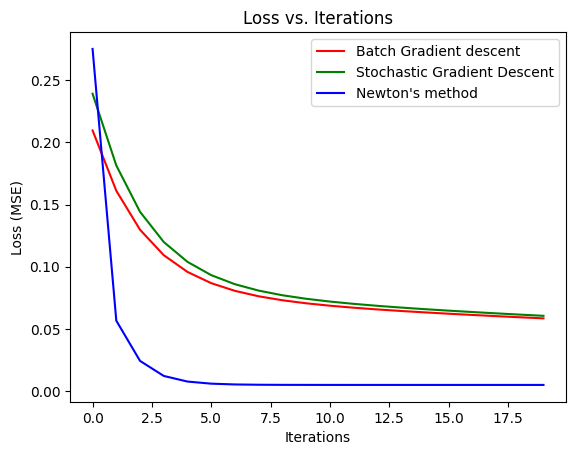

In [68]:
plt.plot(range(20), losses_bg, label='Batch Gradient descent', color='red')
plt.plot(range(20), losses_sg, label='Stochastic Gradient Descent', color='green')
plt.plot(range(20), losses_nm, label='Newton\'s method', color='blue')
plt.title('Loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


## Changed centres

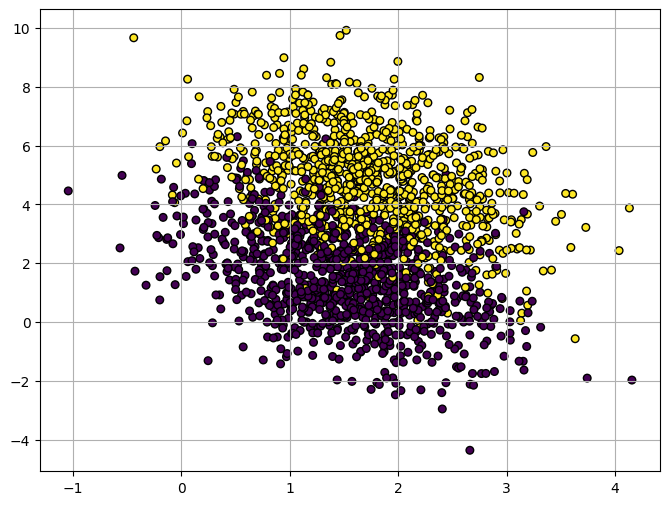

In [70]:
np.random.seed(0)
centers = [[3, 0], [5, 1.5]] #changed
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=30)
plt.grid(True)
plt.show()

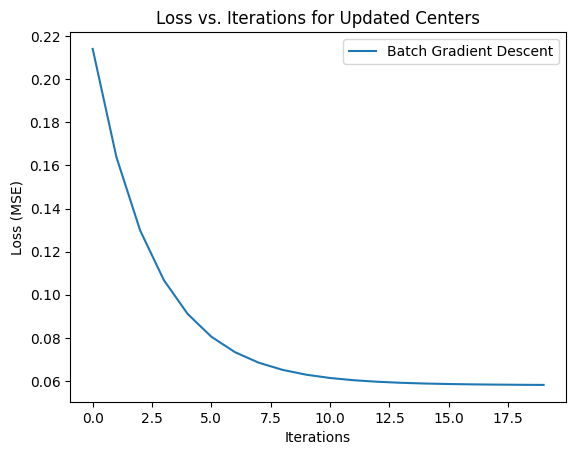

Weights are: [0.04908551 0.13527437]
Bias is: 0.017746202547842305
Minimum Loss: 0.05813945321707209


In [77]:
def batch_gradient_descent(X, y, learning_rate):
    n_iterations = 20
    n_samples, n_features = X.shape
    weights = np.random.randn(n_features)*0.01
    bias = np.random.randn()*0.01
    losses_bg2 = []

    for i in range(n_iterations):
        y_pred = np.dot(X, weights) + bias
        loss = (1/(2*n_samples))*np.sum((y_pred-y)**2)
        losses_bg2.append(loss)
        dw = (1/n_samples)*np.dot(X.T,(y_pred-y))
        db = (1/n_samples)*np.sum(y_pred-y)
        weights = weights - learning_rate*dw
        bias = bias - learning_rate*db

    plt.plot(range(20), losses_bg2, label='Batch Gradient Descent')
    plt.title('Loss vs. Iterations for Updated Centers')
    plt.xlabel('Iterations')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.show()

    print("Weights are:", weights)
    print("Bias is:", bias)
    print("Minimum Loss:", min(losses_bg2))
    return losses_bg2

losses_bg2 = batch_gradient_descent(X, y, 0.01)


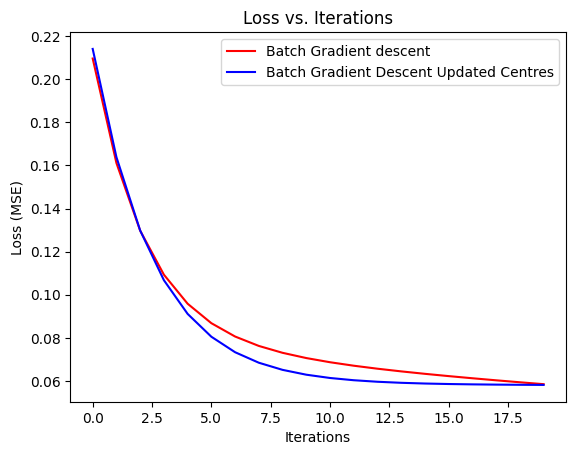

In [78]:
plt.plot(range(20), losses_bg, label='Batch Gradient descent', color='red')
plt.plot(range(20), losses_bg2, label='Batch Gradient Descent Updated Centres', color='blue')
plt.title('Loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()
